# CV vs LB

In [13]:
import glob
import os.path

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pd.options.display.max_rows = 100

In [14]:
submissions = pd.read_csv('submissions.csv')

y_labels = list(range(8))
y_rate = pd.DataFrame({'y': y_labels})
y_nunique_values = []
sub_paths = []
for sub_path in glob.glob(os.path.join('*', '*_submission.csv')):
    sub = pd.read_csv(sub_path)
    y_nunique_values.append(sub.y.nunique())
    sub_paths.append(os.path.basename(sub_path))
    y_rate_ = sub.y.value_counts(normalize=True).reset_index().rename(columns={'index': 'y', 'y': os.path.basename(sub_path)})
    y_rate = pd.merge(y_rate, y_rate_, how='left')

y_rate.fillna(0, inplace=True)
y_rate = y_rate.T.reset_index().rename(columns={'index': 'filename'}).query("filename != 'y'")
submissions = pd.merge(submissions, y_rate, how='left')

y_nunique = pd.DataFrame({'filename': sub_paths, 'numUniqueY': y_nunique_values})
submissions = pd.merge(submissions, y_nunique, how='left')

submissions

,filename,cv,train,valid,LB,Note,0,1,2,3,4,5,6,7,numUniqueY
0,002_submission.csv,Stratified-Kfold(K=5),0.216635,0.132093,0.13110,ロジスティック回帰。class_weight=`balanced`.とりあえず作った。,0.168806,0.304307,0.097078,0.132010,0.111542,0.112666,0.006093,0.067499,8
1,003_submission.csv,Stratified-Kfold(K=5),0.177389,0.146417,0.12748,ロジスティック回帰。とりあえず作った。,0.583885,0.317972,0.067114,0.030584,0.000444,0.000000,0.000000,0.000000,5
2,004_submission.csv,Stratified-Kfold(K=5),0.237700,0.119829,0.12597,KNN。とりあえず作った。,0.514050,0.315221,0.108791,0.056229,0.005354,0.000207,0.000030,0.000118,8
3,005_submission.csv,Stratified-Kfold(K=5),0.157788,0.122426,0.11130,SVM。とりあえず作った。,0.706312,0.253313,0.038955,0.001420,0.000000,0.000000,0.000000,0.000000,4
4,006_submission.csv,Stratified-Kfold(K=5),0.390510,0.151750,0.14547,SVM。class_weight=`balanced`.とりあえず作った。,0.184453,0.462583,0.097758,0.156531,0.088027,0.007690,0.000000,0.002958,7
5,007_submission.csv,Stratified-Kfold(K=5),0.267113,0.137523,0.12089,全特徴量を使用したKNN,0.545581,0.268990,0.057708,0.115476,0.011122,0.000355,0.000000,0.000769,7
6,008_submission.csv,Stratified-Kfold(K=5),1.026566,0.753488,0.11536,全特徴量を使用したSVM. class_weight を指定。Cは1.0,0.119143,0.284075,0.000532,0.535110,0.060755,0.000207,0.000000,0.000177,7
7,009_submission.csv,Stratified-Kfold(K=5),0.261876,0.146291,NaN,全特徴量を使用したSVM. class_weight は指定しない。Cは1.0,0.377337,0.252159,0.000059,0.370445,0.000000,0.000000,0.000000,0.000000,4
8,010_submission.csv,Stratified-Kfold(K=5),0.663369,0.175991,0.12663,全特徴量を使用したSVM. class_weight を指定。Cは10.0,0.252662,0.258252,0.008193,0.471279,0.009347,0.000148,0.000000,0.000118,7
9,012_submission.csv,Stratified-Kfold(K=5),0.913259,0.228066,0.14379,全特徴量を使用したSVM. class_weight を指定。Cは100,0.274048,0.301083,0.054957,0.362991,0.006655,0.000148,0.000000,0.000118,7


<Figure size 1080x1080 with 0 Axes>

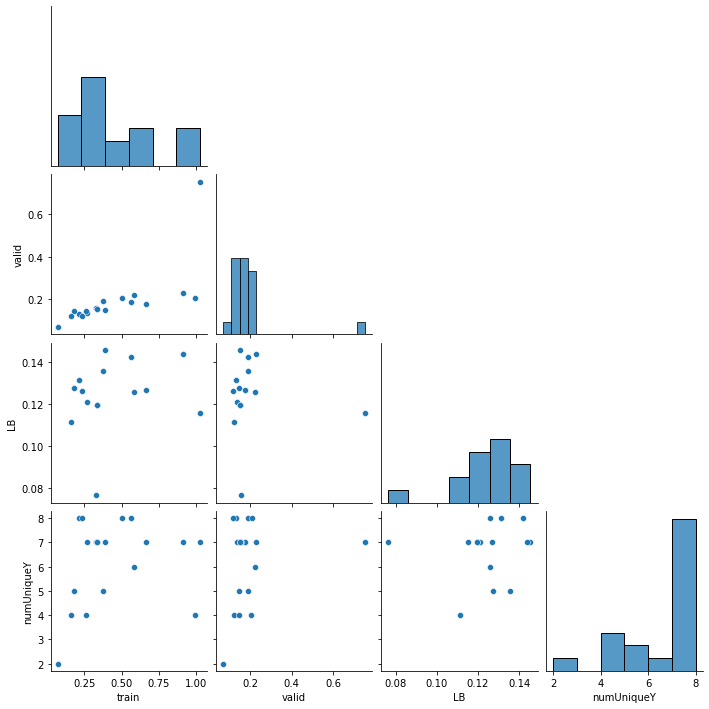

In [11]:
fig = plt.figure(figsize=(15., 15.))
sns.pairplot(submissions[['train', 'valid', 'LB', 'numUniqueY']], corner=True)
sns.despine()

## 2021-06-01

- 特徴量エンジニアリング1段落。対象データは "experiments/001_EDA/" の "test_data_preprocessed.csv" "train_data_preprocessed.csv" である。
- 7番以降で以下のサブを作成する。14通りある。
  - KNN: 1通り
  - SVM(C={0.1, 1.0, 10.0, 100.0}, class_weights={None, 'balanced'}): 8通り
  - XGBoost: 1通り
  - CatBoost(class_weights={None, 'balanced'}): 2通り
  - LightGBM(class_weights={None, 'balanced'}): 2通り
- うまくいったら8,9のノートブックを改良すること

## 2021-06-02

- GBDT のモデルは `class_weights` 指定なしではお話にならないような性能になる
- XGBoost はカテゴリ変数を投じられないのでダミー変数化したが悲惨な性能（016）
  - 022 のノートブックに sample_weight を scikit-learn 的な class_weights の発送から求める例あり
- ベクトルとカテゴリの特徴量を 001_EDA\features に外部化しておいた
  - PCAで次元数をおおむね1/3程度に削減できそう
- 17, 18,19,20, は sub した。22を送信すること。